# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Tasklist 12: Statistical Hypothesis Testing + Correlation(s).

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

### Intro 

The goal of this Tasklist is to consolidate our knowledge of applied Probability Theory so to be able to formulate and solve problems in the Statistical Hypothesis Framework that we have covered in our Session 12. Later on we will touch upon correlation(s) again. Let's do it: 

Import the Python modules that you need (hint: check Session 12):

In [1]:
### your code here ###
import numpy as np
import pandas as pd
import scipy

**N.B.** We have some datasets prepared for this task list, found in the `_data` directory.

In [2]:
import os
work_dir = os.getcwd()
data_dir = os.path.join(work_dir, "_data")
os.listdir(data_dir)

['chi_square_table.csv']

**01.** We will use the `chi_square_table.csv` dataset here.Read through the secion on $\chi^2$ distrubution and the related $\chi^2$ statistical test in Session 12 again. Using only Numpy, Pandas, and SciPy, perform a $\chi^2$ test for the following data set (you will need to compute he test stastics by hand - use Numpy). Compute the probability of Type I Error (the $p$ value), report the test statistic, the $p$ value, and make a conclusion.

In [11]:
### your code here ###
from scipy.stats import chi2
chisq_frame = pd.read_csv(os.path.join(data_dir, "chi_square_table.csv"))
display(chisq_frame)
chsq = np.sum((chisq_frame['observed']-chisq_frame['expected'])**2/chisq_frame['expected'])
print(f'The Chi-Square is: {chsq }')
p = 1 - chi2.cdf(x=chsq, df=2)
print(f'The Type I Error probability is: {p }')

,expected,observed
0,20,80
1,30,20
2,50,70
3,20,10
4,40,60
5,40,30
6,70,40
7,50,30
8,40,20
9,60,60


The Chi-Square is: 277.6904761904762
The Type I Error probability is: 0.0


**02.** Use the same dataset as in **01.** to do the following:

- study the [scipy.stats.chisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) documentation
- import `chisquare` from `scipy.stats`
- and use the `chisquare` method to perform the $\chi^2$ test.
- Note: `ddof` in `scipy.stats.chisquare` is your number of degrees of freedom, which is $k-1$ for the $\chi^2$ test with $k$ categories.

In [17]:
### your code here ###
from scipy.stats import chisquare
k = chisq_frame.shape[0]
scipy.stats.chisquare(f_obs = chisq_frame['observed'], 
                      f_exp= chisq_frame['expected'], 
                      ddof=k-1, 
                      axis=0)

Power_divergenceResult(statistic=277.6904761904762, pvalue=nan)

Confused by something in the results? Well, that is the reason why perhaps you should learn how to do Statistical Hypothesis Testing by hand! Read through this discussion (but do not expect the answer to what worries you): [Getting nan for p values in scipy chisquare: Don't know why?](https://stackoverflow.com/questions/40380217/getting-nan-for-p-values-in-scipy-chisquare-dont-know-why).

**03.** A t-test against a constant value: create a random vector of size `1,000` from the Normal Distribution with $\mu=5$ and $\sigma=2$ and test if its mean is statistically significantly different from `5.3`. Use SciPy to compute the t-test and report your results (you will probably need to import something). Explain the finding in your own words!

In [22]:
### your code here ###
from scipy.stats import ttest_1samp
from scipy.stats import norm
rvs = norm.rvs(loc=5, scale=2, size=100)
print(f'The vector mean is: {np.mean(rvs)}')
t_stat, p_val = ttest_1samp(rvs, popmean=5.3)
# report
print(f"t-statistic: {t_stat}, p-value: {p_val}")

The vector mean is: 5.306840309367837
t-statistic: 0.034871091290508104, p-value: 0.9722527454871368


**04.** A t-test for independent measures. We are assuming the following:

- People educated in Math via method A score, on the average, 78 points on some standardized test X; while
- people educated in Math via method B score, on the average, 65 points on some standardized test X;
- the standard deviation of the test scores is always 14.

Generate two random vectors of size `1,000` each that represent this hypotheses and perform an independent measures t-test for two group means using SciPy. Explain: what justifies the use of and *independent t-test* in this case? Are the two methods empirically really likely to yield different results?

In [23]:
### your code here ###
from scipy.stats import ttest_ind

sample1 = norm.rvs(loc=78, scale=14, size=1000)
sample2 = norm.rvs(loc=65, scale=14, size=1000)

t_stat, p_val = ttest_ind(sample1, sample2)

print(f"t-statistic: {t_stat}, p-value: {p_val}")

t-statistic: 20.930937933334025, p-value: 4.0634306158916473e-88


**05.** A t-test for repeated measures (paired t-test). We are assuming the following:

- Before training with DataKolektiv, people typically (on the average) can score 67 points on some standardize test Y;
- while after training with DataKolektiv they score 88 points on the average;
- it is known that the standard deviation of the test scores is 28.

Generate two random vectors of size `1,000` each that represent these hypotheses and perform an dependent measures t-test for two group means using SciPy. Explain: what justifies the use of a *paired t-test* in this case? According to the test result, is the DataKolektiv training really effective? Explain the finding.

In [24]:
### your code here ###
from scipy.stats import ttest_rel

sample1 = norm.rvs(loc=67, scale=28, size=1000)
sample2 = norm.rvs(loc=88, scale=28, size=1000)

t_stat, p_val = ttest_rel(sample1, sample2)

print(f"t-statistic: {t_stat}, p-value: {p_val}")

t-statistic: -17.77793206383763, p-value: 1.2044123443551853e-61


**06.** Correlation. Generate two random, normally distributed vectors with $\mu=5$ and $\mu=7.5$, both having the same $\sigma=2.3$, both of size `1,000`. Use Numpy `np.cov()` (**N.B.** mind the documentation - the `ddof` argument!) to compute the sample covariance between these two vectors, then standardize them and compute the Pearson correlation coefficient. Use Pandas to visualize produce the respective scatterplot.

<AxesSubplot: xlabel='x', ylabel='y'>

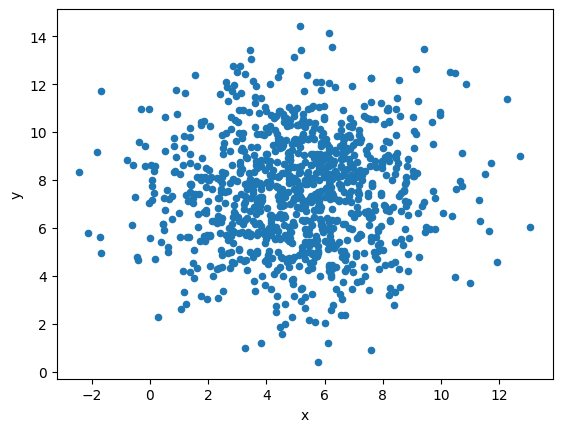

In [29]:
### your code here ###

sample1 = norm.rvs(loc=5, scale=2.3, size=1000)
sample2 = norm.rvs(loc=7.5, scale=2.3, size=1000)
samples = pd.DataFrame({'x':sample1, 'y':sample2})
samples.plot.scatter(x='x', y='y')

In [30]:
### your code here ###
np.cov(samples['x'], samples['y'], ddof=1)

array([[5.74336955, 0.15855241],
       [0.15855241, 5.35187264]])

In [32]:
### your code here ###
samples['zx'] = (samples['x']-np.mean(samples['x']))/np.std(samples['x'], ddof=1)
samples['zy'] = (samples['y']-np.mean(samples['y']))/np.std(samples['y'], ddof=1)
samples

,x,y,zx,zy
0,6.821190,8.889344,0.727583,0.604281
1,4.643629,7.296272,-0.181047,-0.084344
2,4.213493,8.153988,-0.360529,0.286414
3,3.295855,5.716540,-0.743432,-0.767202
4,3.437767,13.420161,-0.684216,2.562781
...,...,...,...,...
995,0.531500,9.210239,-1.896913,0.742991
996,5.923888,8.799845,0.353166,0.565593
997,8.126165,9.616544,1.272110,0.918621
998,5.703734,5.595650,0.261303,-0.819458


In [33]:
np.cov(samples['zx'], samples['zy'], ddof=1)

array([[1.        , 0.02859806],
       [0.02859806, 1.        ]])

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>